In [2]:
# Setting environment 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import datetime as dt

In [3]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Loading csv datafile
pc_df = pd.read_csv("../data/PC_modelData10K.csv" )
pc_df.head()

,Unnamed: 0,Issue_Time,Color,Make,Route,Fine_Amount,Binned
0,947039,1118.0,RD,HOND,00354,58.0,3
1,1256780,1310.0,GY,FORD,00634,73.0,5
2,2937326,814.0,RD,TOYT,00313,63.0,4
3,2762099,35.0,BK,VOLK,00402,68.0,4
4,3179591,1038.0,SL,TOYT,00400,73.0,5


In [4]:
# Dropping an column not needed 
print('Number of columns before:{}'.format(len(pc_df.columns)))
pc_df.drop("Unnamed: 0", axis=1, inplace=True)
print('Number of columns after :{}'.format(len(pc_df.columns)))


Number of columns before:7
Number of columns after :6


In [10]:
# Checking for number of parking citations at a given time
# Checking for top 10 total fine amount for parking citations at given time

import time

pc_df1 = pc_df.groupby("Issue_Time")["Fine_Amount"].sum().sort_values(ascending=False).nlargest(20).reset_index(name="FineAmt")
# print(pc_df1)

pc_df1["Issue_Time"] = pc_df1["Issue_Time"]/100

print("\nMinimum Issue Time:", min(pc_df1["Issue_Time"]))
print("Maximum Issue Time:", max(pc_df1["Issue_Time"]))
pc_df1



Minimum Issue Time: 8.12
Maximum Issue Time: 12.23


,Issue_Time,FineAmt
0,12.21,2854.0
1,8.20,2839.0
2,12.23,2552.0
3,12.10,2513.0
4,8.12,2460.0
5,12.08,2434.0
6,12.14,2399.0
7,12.16,2346.0
8,12.19,2344.0
9,12.13,2344.0


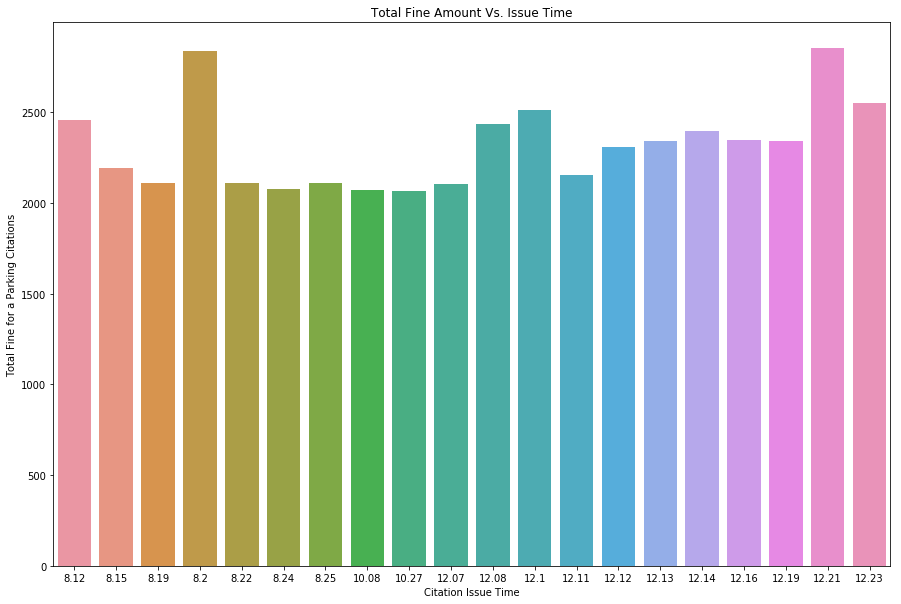

In [11]:
# Plotting chart for number of parking citation at a given time

plt.figure(figsize=(15,10))
sns.barplot(list(pc_df1["Issue_Time"]), list(pc_df1["FineAmt"]))
plt.xlabel("Citation Issue Time")
plt.ylabel("Total Fine for a Parking Citations")
plt.title("Total Fine Amount Vs. Issue Time")
plt.savefig("../imgs/PC_top20_FineAmt_IssueTime.png",bbox_inches='tight')
plt.show()

# Peak citation happen at 08:16 hrs

In [26]:
# Displaying Top 10 Make and the count of citations for each make 

pc_df_top = pc_df.groupby('Make')['Make'].count().sort_values(ascending=False).nlargest(10).reset_index(name='count')
pc_df_top.head()

# TOYT has highest citations! 

,Make,count
0,TOYT,1761
1,HOND,1163
2,FORD,864
3,NISS,718
4,CHEV,660


In [24]:
# Displaying Bottom 5 Make and the count of citations for each make 

pc_df_bot = pc_df.groupby('Make')['Make'].count().sort_values(ascending=True).reset_index(name='count')
pc_df_bot.head()

# Tesla, Jeep Wrangler, Land Rover etc has Lowest citations! 

,Make,count
0,YAMA,1
1,LEXU,1
2,LNCI,1
3,JAG,1
4,ITAS,1


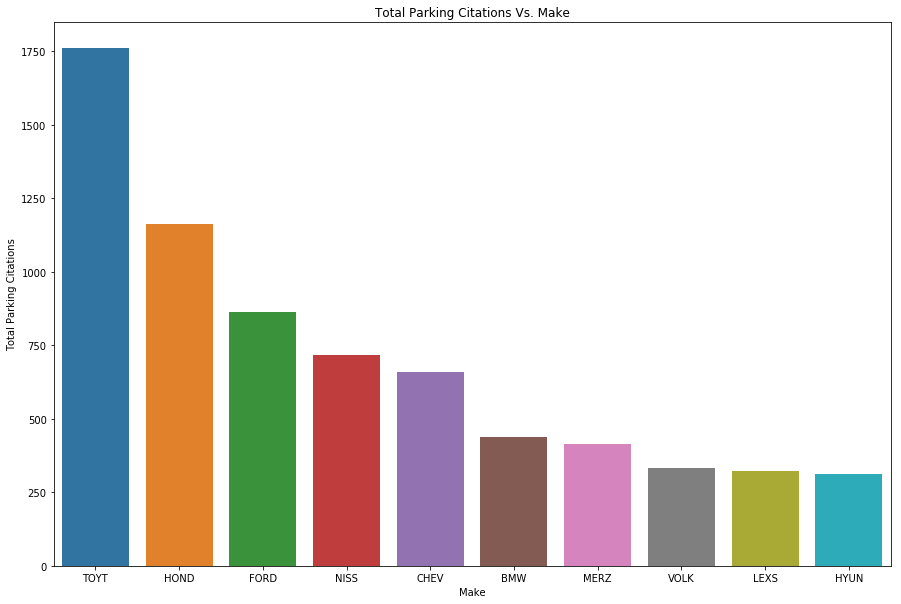

In [27]:
# Plotting chart for the top 10 Makes Vs. count of citations.
#### Bar chart
plt.figure(figsize=(15,10))
sns.barplot(list(pc_df_top["Make"]), list(pc_df_top["count"]))
# plt.plot("Make", "count", data=pc_df_top, linestyle=':' , linewidth=4, color='blue', alpha=0.9)
plt.xlabel("Make")
plt.ylabel("Total Parking Citations")
plt.title("Total Parking Citations Vs. Make")
plt.savefig("../imgs/PC_top10_FineAmt_Make.png",bbox_inches='tight')
plt.show()


In [17]:
# Displaying Top Colors and the count of citations for each make 

df_top_c = pc_df.groupby('Color')['Color'].count().sort_values(ascending=False).nlargest(10).reset_index(name='count')
df_top_c.head(6)

# Black, White, Gray, Silver, Blue, Red color tend to have highest citations! 

,Color,count
0,WT,2075
1,BK,2074
2,GY,1978
3,SL,1345
4,BL,763
5,RD,531


In [18]:
# Displaying Color with least possibility of having more citation and the count of citations for each make 

df_bot_c = pc_df.groupby('Color')['Color'].count().sort_values(ascending=True).reset_index(name='count')
df_bot_c.head(6)

# Maroon, Pink, Blue, Brown color tend to have highest citations! 

,Color,count
0,BE,1
1,TA,1
2,BU,1
3,RU,1
4,PU,1
5,BR,2


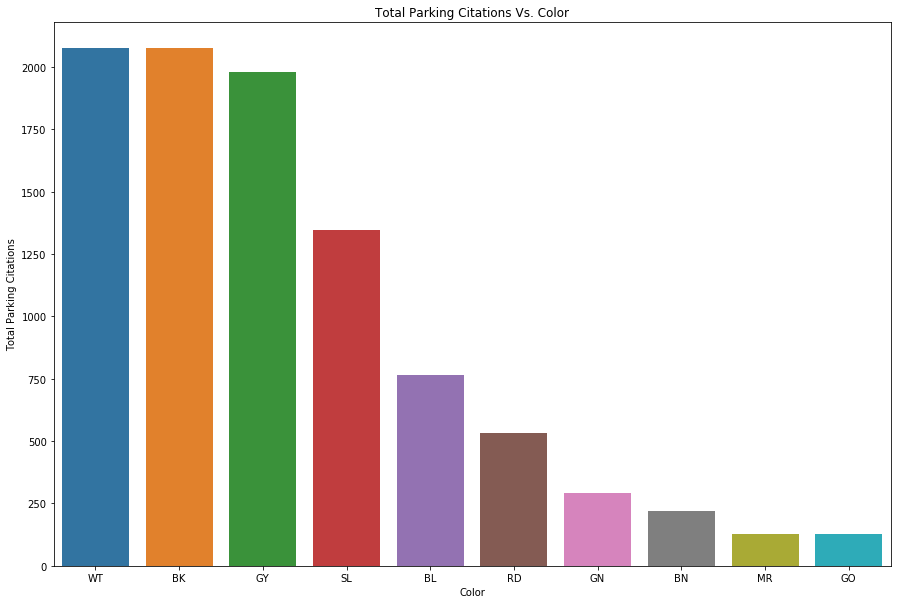

In [21]:
# Plotting chart for the top 10 Vehicle Color Vs. count of citations.

plt.figure(figsize=(15,10))
sns.barplot(list(df_top_c["Color"]), list(df_top_c["count"]))
# plt.plot("Color", "count", data=df_top_c, linestyle='--' , linewidth=4, color='purple', alpha=0.9)
plt.xlabel("Color")
plt.ylabel("Total Parking Citations")
plt.title("Total Parking Citations Vs. Color")
plt.savefig("../imgs/PC_top10_FineAmt_Color.png",bbox_inches='tight')

plt.show()


In [13]:
# Parking Citations count by Top 10 Routes

df_rte = pc_df.groupby('Route')['Route'].count().sort_values(ascending=False).nlargest(10).reset_index(name='count')
df_rte.head(10)


,Route,count
0,00600,619
1,00500,395
2,00402,224
3,00401,200
4,00403,148
5,00315,147
6,00111,138
7,00107,119
8,00483,111
9,00400,110


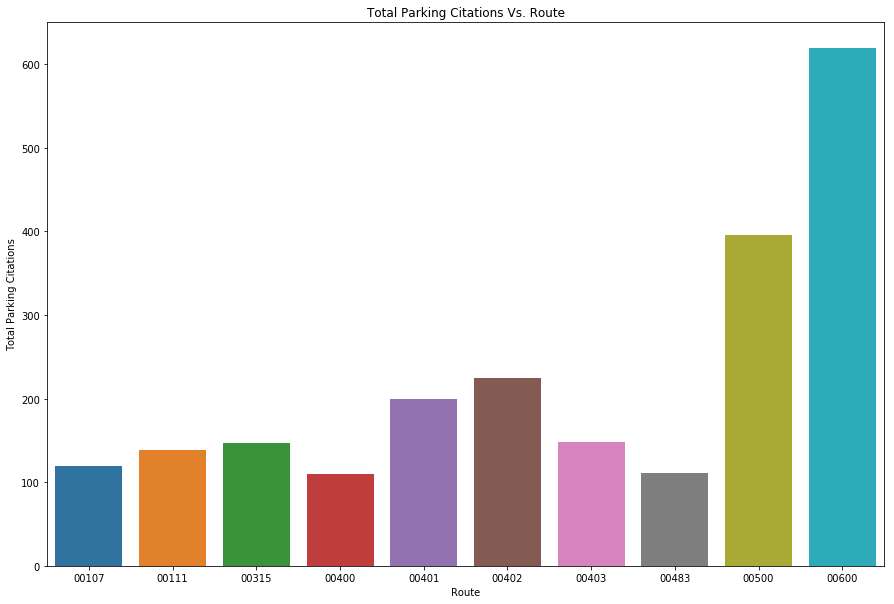

In [15]:
# Plotting chart for the top 10 Makes Vs. count of citations.

plt.figure(figsize=(15,10))
sns.barplot(list(df_rte["Route"]), list(df_rte["count"]))
# plt.plot("Route", "count", data=df_rte, color='red', linestyle='-.' , linewidth=4, alpha=0.9)
plt.xlabel("Route")
plt.ylabel("Total Parking Citations")
plt.title("Total Parking Citations Vs. Route")
plt.savefig("../imgs/PC_top20_FineAmt_Route.png",bbox_inches='tight')

plt.show()


In [29]:
# Viewing Fine_Amount against multiple features for top 20 rows in order of max fine amts

# pc_df.head()
pc_df_all = pc_df[["Route","Make","Color","Fine_Amount"]]
pc_df_alls = pc_df.groupby(["Route","Make","Color"])["Fine_Amount"].sum().sort_values(ascending=False).nlargest(20).reset_index(name='Total')
# pc_df_alls = pc_df.groupby(["Route","Make","Color"])["Fine_Amount"].sum().sort_values(ascending=False).reset_index(name='Total')
pc_df_alls.head()


,Route,Make,Color,Total
0,00600,TOYT,WT,1777.0
1,00500,TOYT,GY,1628.0
2,00600,HOND,SL,1531.0
3,00500,HOND,GY,1430.0
4,00600,FORD,WT,1409.0


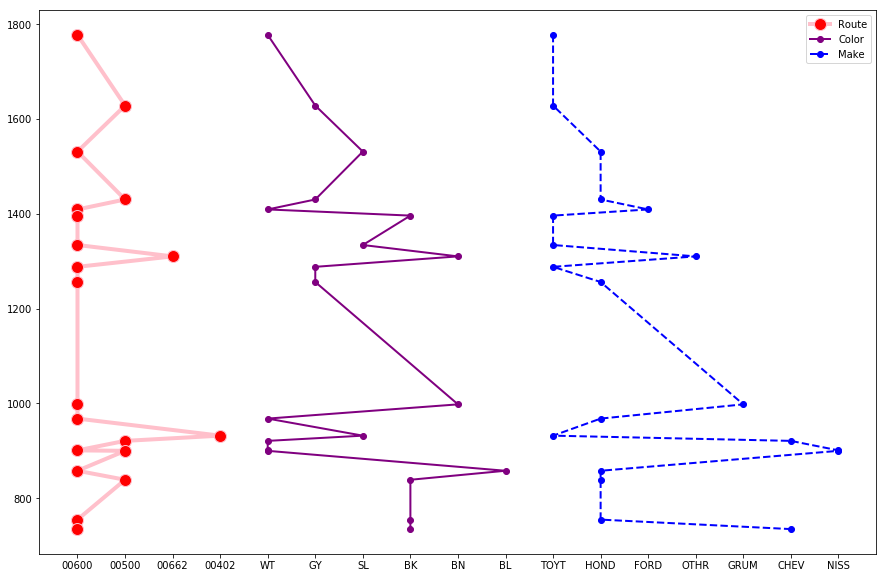

In [30]:
# Multiple line plot

plt.figure(figsize=(15,10))
plt.plot('Route','Total',  data=pc_df_alls, marker='o', markerfacecolor='Red', markersize=12, color='pink', linewidth=4, label="Route")
plt.plot('Color','Total',  data=pc_df_alls, marker='o', color='Purple', linewidth=2, label="Color")
plt.plot('Make', 'Total', data=pc_df_alls, marker='o', color='Blue', linewidth=2, linestyle='dashed', label="Make")
plt.legend()
plt.savefig("../imgs/PC_FineAmt_Route_Make_Model.png",bbox_inches='tight')
plt.show()

